In [ ]:
E(y) = bo+b1x1+b2x2+............b103*x103+bnxn...

In [3]:
import pandas as pd

In [ ]:
car = pd.read_csv("D://data/mtcars.csv")

In [ ]:
car

In [ ]:
import seaborn as sns

In [ ]:
car.columns

In [ ]:
sns.pairplot(car)

In [ ]:
# Eigen values
# Eigen vectors

In [ ]:
# Eigen values --> Solve systems of linear differential equations

In [ ]:
# Eigen vector must be non-trivial (non-zero)
# lambda (eigen value)--> Scalar value
# A matrix can have multiple eigen values not more than it's number of rows/columns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
car = pd.DataFrame([[3,4],[2,8],[6,9]], columns=["wt","hp"])

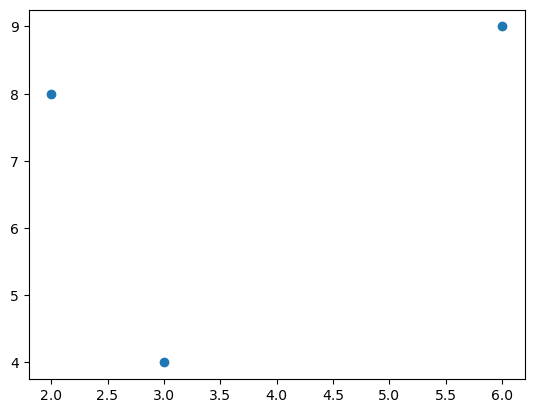

In [5]:
plt.scatter(car['wt'],car['hp'])

In [ ]:
# Make the data centered

In [ ]:
xi-mean(x) --> center
xi-mean(x)/std(x) --> scale

In [ ]:
np.mean(car.T, axis=1)

In [6]:
centered_data = car-np.mean(car.T, axis=1)

In [ ]:
centered_data

In [12]:
car.T

,0,1,2
wt,3,2,6
hp,4,8,9


In [ ]:
# Find the covariance matrix for the scaled data

In [7]:
cov_car = np.cov(centered_data.T)

In [ ]:
# Find the eigen values and eigen vectors for the covariance matrix

In [8]:
from numpy.linalg import eig

In [9]:
eval,evec = eig((cov_car))

In [10]:
eval

array([2.83333333, 8.5       ])

In [11]:
evec

array([[-0.85749293, -0.51449576],
       [ 0.51449576, -0.85749293]])

In [ ]:
# Let's project the data into principal components as nex axis

In [13]:
data = evec.T.dot(centered_data.T)

In [14]:
data.T

array([[-9.71825316e-01,  2.91547595e+00],
       [ 1.94365063e+00,  1.11022302e-16],
       [-9.71825316e-01, -2.91547595e+00]])

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
pca.fit_transform(car)

array([[ 2.91547595e+00, -9.71825316e-01],
       [-6.86635020e-16,  1.94365063e+00],
       [-2.91547595e+00, -9.71825316e-01]])

In [17]:
pca_df = pd.DataFrame(data=pca.fit_transform(car), columns=['pc1','pc2'])

In [18]:
pca_df

,pc1,pc2
0,2.915476e+00,-0.971825
1,-6.866350e-16,1.943651
2,-2.915476e+00,-0.971825


In [19]:
car

,wt,hp
0,3,4
1,2,8
2,6,9


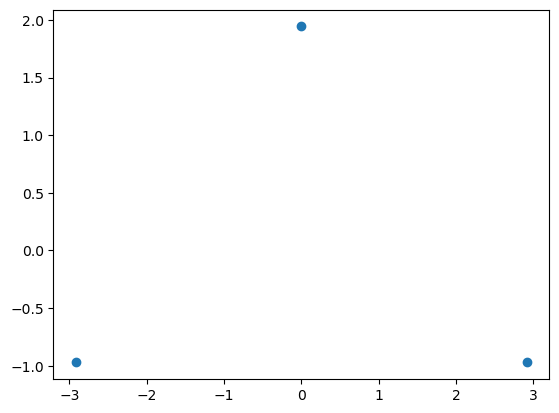

In [20]:
plt.scatter(pca_df['pc1'],pca_df['pc2'])

In [ ]:
pca.inverse_transform(pca.fit_transform(car))

In [ ]:
pca.fit_transform(car)

In [ ]:
# understand the weight of each variaable or each principal component

In [ ]:
pca.components_

In [ ]:
pd.DataFrame(pca.components_.T, columns=['pc1','pc2'], index=['mpg','hp'])

In [ ]:
pca.explained_variance_ratio_

In [ ]:
df = pd.read_csv('Wine.csv')

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.corr()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
round(df.describe(),2).T

In [ ]:
x = df.iloc[:,0:13]

In [ ]:
vif['features'] = x.columns

In [ ]:
vif['vif']=[variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 

In [ ]:
x = df.iloc[:,:-1]

In [ ]:
x.columns

In [ ]:
y = df['Customer_Segment']

In [ ]:
# Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x = sc.fit_transform(x)

In [ ]:
# Split the data into train and test samples

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10, random_state=8)

In [ ]:
# Applying PCA

In [ ]:
pca1 = PCA(n_components=2)
x_train_pc = pca1.fit_transform(x_train)
x_test_pc = pca1.transform(x_test)

In [ ]:
pca1.n_components

In [ ]:
pca1.explained_variance_ratio_

In [ ]:
df.Customer_Segment.value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(random_state=2)

In [ ]:
lg.fit(x_train_pc,y_train)

In [ ]:
y_pred = lg.predict(x_test_pc)

In [ ]:
pd.crosstab(y_test,y_pred)

In [ ]:
17/18

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
lg.fit(x_train,y_train)

In [ ]:
y_pred2 = lg.predict(x_test)

In [ ]:
pd.crosstab(y_test,y_pred2)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train_pc, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
pd.crosstab(y_train,lg.predict(x_train_pc))

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_pc, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
# Kernel PCA --> It projects the data into higher dimentions for a better seperation of non-linear data

In [ ]:
df = pd.read_csv("D://data/Social_Network_Ads.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.Purchased.value_counts()

In [ ]:
143/400

In [ ]:
df.corr()

In [ ]:
sns.countplot(df['Gender'], hue=df['Purchased'])

In [ ]:
df['Gender'].value_counts()

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.columns

In [ ]:
x = df.iloc[:,[2,3]]

In [ ]:
y = df['Purchased']

In [ ]:
# Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=2)

In [ ]:
# Apply kernel pca

In [ ]:
from sklearn.decomposition import KernelPCA, PCA, 

In [ ]:
kpca = KernelPCA(n_components=2, kernel='sigmoid')

In [ ]:
xtrain_kpca = kpca.fit_transform(x_train)
xtest_kpca = kpca.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(random_state=2)

In [ ]:
lgmodel = lg.fit(xtrain_kpca, y_train)

In [ ]:
ypred = lgmodel.predict(xtest_kpca)

In [ ]:
pd.crosstab(y_test,ypred)

In [ ]:
10/11

In [ ]:
32/40

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = xtrain_kpca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lgmodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = xtest_kpca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lgmodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
pca = PCA(n_components=2)

In [ ]:
xtrain_pca = pca.fit_transform(x_train)
xtest_pca = pca.transform(x_test)

In [ ]:
lgmodel1 = lg.fit(xtrain_pca, y_train)

In [ ]:
ypred1 = lgmodel1.predict(xtest_pca)

In [ ]:
pd.crosstab(y_test,ypred1)

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = xtrain_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lgmodel1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
help(plt.scatter)

In [ ]:
help(ListedColormap)

In [ ]:
# Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
xtrain_lda = lda.fit_transform(x_train,y_train)

In [ ]:
xtest_lda = lda.transform(x_test)

In [ ]:
model_lda = lg.fit(xtrain_lda,y_train)

In [ ]:
ypred2 = model_lda.predict(xtest_lda)

In [ ]:
pd.crosstab(y_test,ypred2)

In [ ]:
# Factor analysis

In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.decomposition import FactorAnalysis

In [20]:
fa = FactorAnalysis(n_components=5, random_state=2)

In [ ]:
help(FactorAnalysis)

In [21]:
fa.fit(df)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=5,
               noise_variance_init=None, random_state=2,
               svd_method='randomized', tol=0.01)